In [82]:
import pygal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython

In [2]:
import Bio
from Bio import Entrez
from Bio import SeqIO

In [3]:
# from pygal.style import CleanStyle
from pygal.style import DarkStyle

In [18]:
# kv = pd.read_csv("/Users/angueyraaristjm/Documents/LiMolec/zfRNAseq/20181018/20181018_DESeq2/CSV/zfUVS_significant.csv")
kv = pd.read_csv("/Users/angueyraaristjm/Documents/LiMolec/sqMolec/sqRNAseq/SqConesSM.csv")
kv = kv.sort_values(by='padj',ascending=False)
kv = kv.reset_index(drop=True)
# kv.symbol[1]
kv.head(10)
# kv = pd.read_csv("SqConesSM.csv")

Unnamed: 0        SYMBOL    baseMean  log2FoldChange     lfcSE      stat  \
0        4798  LOC101970190   37.329208       -0.046866  0.480770 -0.097481   
1        6392          Parl  546.201260        0.000035  0.584143  0.000060   
2        6394         Parp1  927.395747       -0.229993  0.385461 -0.596668   
3        6395        Parp10  437.208150       -0.001369  0.405425 -0.003376   
4        6396        Parp11   95.227790        0.069170  0.638077  0.108404   
5        6397        Parp16   11.019001       -0.546262  0.560395 -0.974780   
6        6398         Parp2   75.906939        0.603265  0.634527  0.950732   
7        6399         Parp4  390.961470        0.256898  0.441018  0.582510   
8        6400         Parp8    9.761982       -0.517102  0.517251 -0.999712   
9        6401         Pars2   49.581411       -0.669052  0.586709 -1.140347   

     pvalue      padj  Aw_S-Cone1  Aw_M-Cone1     ...       Aw_S-Cone3  \
0  0.922344  0.999952    0.000000   11.876556     ...        42.331774   
1  0.999952  0.999952  253.580870  475.062249     ...       440.045617   
2  0.550729  0.999952  879.080350  688.840261     ...      1161.392698   
3  0.997306  0.999952  405.729392  356.296687     ...       274.132374   
4  0.913675  0.999952   67.621565    0.000000     ...         0.000000   
5  0.329669  0.999952    0.000000   11.876556     ...        21.848657   
6  0.341741  0.999952   16.905391    0.000000     ...       241.359388   
7  0.560223  0.999952  659.310262  296.913906     ...       497.739728   
8  0.317450  0.999952   50.716174    0.000000     ...         0.000000   
9  0.254142  0.999952    0.000000   11.876556     ...         0.000000   

   Aw_M-Cone2   Aw_M-Cone3   Aw_S-Cone4  Aw_S-Conex5  Hb_M-Cone1   Hb_S-Cone2  \
0   33.279515    30.478701    62.895989    48.999380   53.895477    39.093631   
1    0.000000   840.266261   304.525184   285.399895  466.605950  1389.652015   
2  418.641170  1341.588345  1010.408226  1733.030690  342.119114   606.654401   
3  228.418489   163.428898   265.611119   725.534674  429.992175   806.341293   
4   13.614347   190.229135    24.886902    44.701188  102.225660    58.781071   
5    0.378176     0.000000    91.402804     7.736744    0.000000     0.000000   
6    0.756353   201.264527    34.389174    16.333127  123.901015    20.531187   
7  543.817528   360.489465   620.815086   250.154728  171.645378   226.405560   
8   10.210760     0.000000     0.452489    11.175297    0.000000    53.999835   
9    0.378176     0.000000    40.724022     0.859638   72.641730    89.999726   

    Hb_M-Cone2  Hb_S-Cone3  Hb_M-Cone3  
0    60.143486   47.229327   35.472411  
1   703.924275  715.222843  795.495150  
2  1567.412902  407.980996  675.029438  
3   754.248417  345.678480  693.292462  
4     0.000000  170.578261  291.154737  
5     3.682254    0.000000    6.321816  
6   147.290171   17.585388  166.474482  
7   669.556569  172.336800  554.563727  
8     0.000000    0.000000    0.351212  
9     0.000000    7.034155    0.000000  

[10 rows x 21 columns]

In [19]:
!pwd

/Users/angueyraaristjm/Documents/Python/PythonCode/RNAseq


In [20]:
kv.head()

Unnamed: 0        SYMBOL    baseMean  log2FoldChange     lfcSE      stat  \
0        4798  LOC101970190   37.329208       -0.046866  0.480770 -0.097481   
1        6392          Parl  546.201260        0.000035  0.584143  0.000060   
2        6394         Parp1  927.395747       -0.229993  0.385461 -0.596668   
3        6395        Parp10  437.208150       -0.001369  0.405425 -0.003376   
4        6396        Parp11   95.227790        0.069170  0.638077  0.108404   

     pvalue      padj  Aw_S-Cone1  Aw_M-Cone1     ...       Aw_S-Cone3  \
0  0.922344  0.999952    0.000000   11.876556     ...        42.331774   
1  0.999952  0.999952  253.580870  475.062249     ...       440.045617   
2  0.550729  0.999952  879.080350  688.840261     ...      1161.392698   
3  0.997306  0.999952  405.729392  356.296687     ...       274.132374   
4  0.913675  0.999952   67.621565    0.000000     ...         0.000000   

   Aw_M-Cone2   Aw_M-Cone3   Aw_S-Cone4  Aw_S-Conex5  Hb_M-Cone1   Hb_S-Cone2  \
0   33.279515    30.478701    62.895989    48.999380   53.895477    39.093631   
1    0.000000   840.266261   304.525184   285.399895  466.605950  1389.652015   
2  418.641170  1341.588345  1010.408226  1733.030690  342.119114   606.654401   
3  228.418489   163.428898   265.611119   725.534674  429.992175   806.341293   
4   13.614347   190.229135    24.886902    44.701188  102.225660    58.781071   

    Hb_M-Cone2  Hb_S-Cone3  Hb_M-Cone3  
0    60.143486   47.229327   35.472411  
1   703.924275  715.222843  795.495150  
2  1567.412902  407.980996  675.029438  
3   754.248417  345.678480  693.292462  
4     0.000000  170.578261  291.154737  

[5 rows x 21 columns]

In [21]:
# kv.symbol.tail()
kv.SYMBOL[1]

'Parl'

In [95]:
def log2(m):
    if m>0:
        return np.log2(m)
    else:
        return 0
    
def log2series(m):
    tempseries=m
    for i in range(0,len(tempseries)):
        tempseries[i]=log2(tempseries[i])
    return tempseries

def approx(n):
    return np.round(n, decimals=2)

def svgreload():
    !osascript -e 'tell application "Google Chrome" to tell the active tab of second window to reload'

### Semi-Interactive display

In [50]:
from pygal.style import DarkStyle


chart = pygal.XY(
    stroke=False, 
#     x_title='log2(baseMean)',
#     y_title='log2(foldChange)',
    x_title='normalized counts',
    y_title='fold change',
    show_legend=False,
    show_y_guides=True,
    show_x_guides=True,
#     range=(-16,16),
#     style=DarkStyle,
    include_x_axis=True
)

# chart.x_labels = (
#     {'label': '1','value': log2(1)},
#     {'label': '2','value': log2(2)},
#     {'label': '4','value': log2(4)},
#     {'label': '8','value': log2(8)},
#     {'label': '16','value': log2(16)},
#     {'label': '32','value': log2(32)},
#     {'label': '64','value': log2(64)},
#     {'label': '128','value': log2(128)},
#     {'label': '256','value': log2(256)},
#     {'label': '16384','value': log2(16384)},
#     {'label': '131072','value': log2(131072)},
#     {'label': '1048576','value': log2(1048576)},
# )


chart.x_labels = (
    {'label': str(2 ** 1),'value': 1},
    {'label': str(2 ** 2),'value': 2},
    {'label': str(2 ** 3),'value': 3},
    {'label': str(2 ** 4),'value': 4},
    {'label': str(2 ** 5),'value': 5},
    {'label': str(2 ** 6),'value': 6},
    {'label': str(2 ** 7),'value': 7},
    {'label': str(2 ** 8),'value': 8},
    {'label': str(2 ** 10),'value': 10},
    {'label': str(2 ** 12),'value': 12},
    {'label': str(2 ** 14),'value': 14},
    {'label': str(2 ** 16),'value': 16},
    {'label': str(2 ** 18),'value': 18},
    {'label': str(2 ** 20),'value': 20},
)

chart.y_labels = (
    {'label': str(2 ** 0),'value': 0},
    {'label': str(2 ** 1),'value': 1},
    {'label': str(2 ** 2),'value': 2},
    {'label': str(2 ** 4),'value': 4},
    {'label': str(2 ** 6),'value': 6},
    {'label': str(2 ** 8),'value': 8},
    {'label': str(2 ** 10),'value': 10},
    {'label': str(2 ** 12),'value': 12},
    {'label': str(2 ** 14),'value': 14},
    {'label': str(2 ** 16),'value': 16},
    {'label': str(-(2 ** 1)),'value': -1},
    {'label': str(-(2 ** 2)),'value': -2},
    {'label': str(-(2 ** 4)),'value': -4},
    {'label': str(-(2 ** 6)),'value': -6},
    {'label': str(-(2 ** 8)),'value': -8},
    {'label': str(-(2 ** 10)),'value': -10},
    {'label': str(-(2 ** 12)),'value': -12},
    {'label': str(-(2 ** 14)),'value': -14},
    {'label': str(-(2 ** 16)),'value': -16},
)

# chart.add(
#         'oLine',
#         [{
#             'value': [(1, -5), (1, 5)],
#             'color': 'rgba(0,0,255,.90)',
#             'node': {'r': 10}
#         }]
#     )
chart.add('oLine', [(1,0),(20,0)], stroke=True,color='rgb(255,255,255)',show_dots=False)

for x in range(0, len(kv)):
    if np.isnan(kv.padj[x]):
        xcolor = 'rgb(255,255,255)'
        xr = 2
    elif kv.padj[x] > 0.1:
        xcolor = 'rgb(255,255,255)'
        xr = 2
    else:
        if kv.log2FoldChange[x]>0:
            xcolor = 'rgb(180,0,255)'
            xr = 5
        else:
            xcolor = 'rgb(50,50,255)'
            xr = 5
        
    chart.add(
        kv.SYMBOL[x],
        [{
            'value': ( approx(log2(kv.baseMean[x])), approx(kv.log2FoldChange[x]) ),
            'color': xcolor,
            'node': {'r': xr}
        }]
    )
# #Cheat to add opn1sw1 as significant
# chart.add(
#         'opn1sw1',
#         [{
#             'value': ( approx(log2(1036242.01)), approx(2.4592) ),
#             'color': 'rgb(180,0,255)',
#             'node': {'r': 5}
#         }]
#     )

chart.render_to_file("/Users/angueyraaristjm/Documents/LiMolec/sqMolec/sqRNAseq/test2.svg")
svgreload()
IPython.display.Audio("OOT_Fanfare_Item.wav", autoplay=True)

In [70]:
print('max_log2FC = ' + str(kv['log2FoldChange'].max()))
print('min_padj = ' + str(-(np.log10(kv['padj'].min()))))
-(np.log10(kv[kv['SYMBOL']=='Kcnj14']['padj']))
# kv[kv['SYMBOL']=='Kcnj14']['padj']

max_log2FC = 5.66190114614305
min_padj = 203.09837941147043


9554    1.727483
Name: padj, dtype: float64

0.1501118883017688

### Volcano-plot using pygal

In [79]:
from pygal.style import DarkStyle


chart = pygal.XY(
    stroke=False, 
    x_title='fold change',
    y_title='-log(p-value)',
    show_legend=False,
    show_y_guides=False,
    show_x_guides=False,
#     range=(0,20),
#     xrange=(-7, 7),
#     style=DarkStyle,
    include_x_axis=True,
#     x_label_rotation=20,
    truncate_label=-1,
)



chart.x_labels = (
    {'label': str(2 ** 0),'value': 0},
    {'label': str(2 ** 1),'value': 1},
    {'label': str(2 ** 2),'value': 2},
    {'label': str(2 ** 4),'value': 4},
    {'label': str(2 ** 6),'value': 6},
    {'label': str(2 ** 7),'value': 7},
    {'label': str(-(2 ** 1)),'value': -1},
    {'label': str(-(2 ** 2)),'value': -2},
    {'label': str(-(2 ** 4)),'value': -4},
    {'label': str(-(2 ** 6)),'value': -6},
    {'label': str(-(2 ** 7)),'value': -7},
)


for x in range(0, len(kv),1):
    if np.isnan(kv.padj[x]):
        xcolor = 'rgb(0,0,0)'
        xr = 2
        thisx = 0
        thisy = 0
    elif kv.padj[x] > 0.1:
        xcolor = 'rgb(0,0,0)'
        xr = 2
        thisx = approx(kv.log2FoldChange[x])
        thisy = -(np.log10(kv.padj[x]))
    else:
        if kv.log2FoldChange[x]>0:
            xcolor = 'rgb(180,0,255)'
            xr = 5
        else:
            xcolor = 'rgb(50,50,255)'
            xr = 5
        thisx = approx(kv.log2FoldChange[x])
        thisy = -(np.log10(kv.padj[x]))
        if thisy > 20:
            thisy = 14 + np.random.rand()*2
            thisx = -6 + np.random.rand()/2
    chart.add(
        kv.SYMBOL[x],
        [{
            'value': ( thisx, thisy ),
            'color': xcolor,
            'node': {'r': xr}
        }]
    )
    
    if kv.SYMBOL[x] in ['Kcnj14','Nrxn3','Opn1sw','Cadm1']:
        chart.add(
        kv.SYMBOL[x],
        [{
            'value': ( thisx, thisy ),
            'color': 'rgb(255,0,0)',
            'node': {'r': 10}
        }]
    )


chart.render_to_file("/Users/angueyraaristjm/Documents/LiMolec/sqMolec/sqRNAseq/test.svg")
svgreload()
IPython.display.Audio("OOT_Fanfare_Item.wav", autoplay=True)

ValueError: could not convert string to float: 'OOT_Fanfare_Item.wav'

### VolcanoPlot using matplotlib

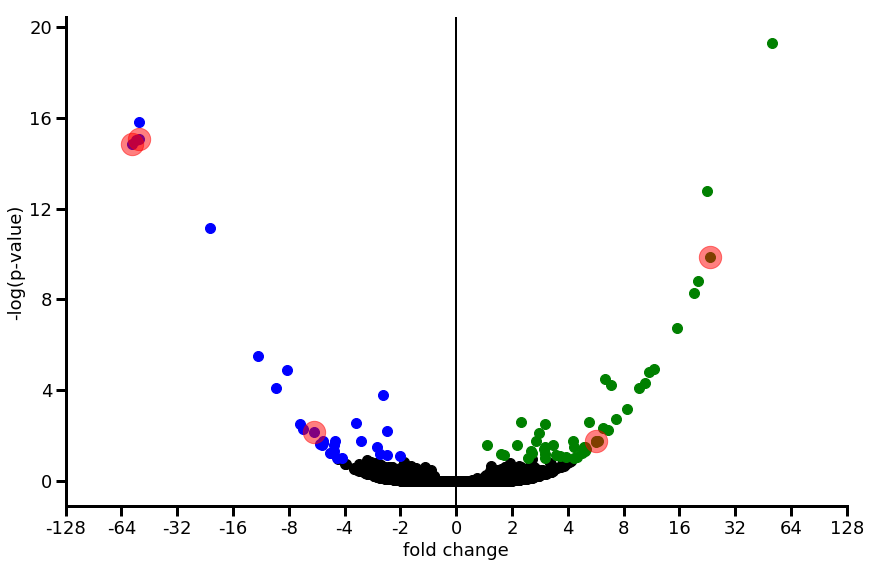

In [173]:
lfc = approx(kv.log2FoldChange.values)
padj = -(np.log10(kv.padj.values))


plt.figure(1, figsize=(14, 9))
ax = plt.subplot(111)



for x in range(0, len(kv),1):
    if padj[x] > 20:
        padj[x] = 14 + np.random.rand()*2
        lfc[x] = -6 + np.random.rand()/2
    if kv.SYMBOL[x] in ['Kcnj14','Nrxn3','Opn1sw','Cadm1','Tjp2']:
        plt.scatter(lfc[x],padj[x], marker='o',c='r', alpha = 0.5 ,s=500,zorder=10)

mask_blah = (~np.isnan(kv.padj)) & (kv.padj > 0.1)
plt.scatter(lfc[mask_blah], padj[mask_blah], marker='o', c='k', s=100)
mask_s = (kv.log2FoldChange < 0) & (kv.padj < 0.1)
plt.scatter(lfc[mask_s], padj[mask_s], marker='o', c='b', s=100)
mask_m = (kv.log2FoldChange > 0) & (kv.padj < 0.1)
plt.scatter(lfc[mask_m], padj[mask_m], marker='o', c='g', s=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
plt.xticks(np.arange(-7,8),[-2**7,-2**6,-2**5,-2**4,-2**3,-2**2,-2**1,0,2**1,2**2,2**3,2**4,2**5,2**6,2**7])
plt.yticks(np.arange(0,22,4),np.arange(0,22,4))

ax.set_xlabel("fold change", fontname="Avenir", fontsize=18)
ax.set_ylabel("-log(p-value)", fontname="Avenir", fontsize=18)
ax.axvline(linewidth=2,c='k')
ax.tick_params(labelsize=18, width=3, length = 10)
for tick in ax.get_xticklabels():
    tick.set_fontname("Avenir")
for tick in ax.get_yticklabels():
    tick.set_fontname("Avenir")
    
# plt.show()





plt.savefig("{0}.svg".format("sqVolcanoPlot"), transparent=True, format="svg")
# plt.savefig("{0}.pdf".format("sqVolcanoPlot"))

In [136]:
help (np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [80]:
cd '/Users/angueyraaristjm/Documents/LiMolec/sqMolec/sqRNASeq'

/Users/angueyraaristjm/Documents/LiMolec/sqMolec/sqRNASeq


In [81]:
!rsvg-convert -f pdf -o testEel.pdf test2.svg

CSS parsing error
CSS parsing error


In [ ]:
# !conda install -c anaconda fontconfig -y

In [ ]:
searchterm = kv.SYMBOL[1] + "[SYM] ictidomys[ORGN]"
print(searchterm)

In [ ]:

Entrez.email='angueyra@nih.gov' #please update with your email address
temp = Entrez.esearch(db="Gene", term=searchterm) 
record = Entrez.read(temp)
temp.close()
record["IdList"]

In [ ]:
chart.add('First', [{
  'value': 2,
  'label': 'This is the first',
  'xlink': 'http://en.wikipedia.org/wiki/First'}])

In [ ]:
chart = pygal.XY(
    stroke=False, 
    x_title='log2(baseMean)',
    y_title='log2(foldChange)',
    show_legend=False,
)
chart.add('oLine',(0,0))
chart.add('all',list(zip(kv.baseMean,kv.log2FoldChange)))
chart.render_to_file('test.svg')
IPython.display.Audio("OOT_Fanfare_Item.wav", autoplay=True)

In [ ]:
baseMean=(kv.baseMean.da);


In [ ]:
a=kv.baseMean.data

In [ ]:
b=log2series(a[0:5])

In [ ]:
b[0]

In [ ]:
help (pygal.graph.public)